## Data Input and Cleaning

In [1]:
import pandas as pd

# Read CSV
planet_df = pd.read_csv('exoplanet_data.csv')
planet_df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [2]:
# Drop the null columns where all values are null
clean_df = planet_df.dropna(axis='columns', how='all')

# Drop the null rows
clean_df = clean_df.dropna()
clean_df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


## Feature Selection and Pre-processing

In [3]:
# List features
feature_names = []
for n in  clean_df.columns:
    feature_names.append(n)

In [4]:
# List labels
label_names = []
for n in  clean_df['koi_disposition'].unique():
    label_names.append(n)

In [5]:
# Define X and y
labels = clean_df['koi_disposition']
features = clean_df.drop('koi_disposition', axis=1)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Scale features
scaler.fit(features)
features = scaler.transform(features)

In [7]:
features_df = pd.DataFrame(features)
features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.0,0.0,0.0,0.0,0.050570,0.001581,0.998419,0.031063,0.006171,0.993829,...,0.953260,0.831296,0.043478,0.904667,0.004547,0.004045,0.999412,0.552405,0.733837,0.692702
1,0.0,1.0,0.0,0.0,0.018338,0.000095,0.999905,0.040928,0.001006,0.998994,...,0.898442,0.845778,0.029891,0.825223,0.004219,0.008977,0.999249,0.784312,0.733360,0.700058
2,0.0,1.0,0.0,0.0,0.001379,0.000002,0.999998,0.036828,0.000187,0.999813,...,0.899596,0.849539,0.036005,0.833168,0.003791,0.007744,0.999355,0.259712,0.742947,0.713365
3,0.0,0.0,0.0,0.0,0.002116,0.000024,0.999976,0.037781,0.001971,0.998029,...,0.878246,0.825842,0.047554,0.791460,0.005208,0.012868,0.998719,0.406994,0.739203,0.706091
4,0.0,0.0,0.0,0.0,0.003618,0.000067,0.999933,0.038804,0.003324,0.996676,...,0.866128,0.834869,0.036685,0.772592,0.004797,0.012136,0.998989,0.751443,0.739105,0.723035


In [8]:
# Create variable to test feature selection on
sel_features = features.copy()

In [9]:
from sklearn.feature_selection import SelectPercentile, chi2
#sel_features = SelectPercentile(chi2, percentile=90).fit_transform(sel_features, labels)

## Creating Test Train Split 

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sel_features, labels, random_state=42)

## Training the Model 

In [11]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=200)

forest_model = forest_model.fit(X_train, y_train)

predictions = forest_model.predict(X_test)

In [12]:
print(f"Training Data Score: {forest_model.score(X_train, y_train)}")
print(f"Testing Data Score: {forest_model.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9038901601830663


In [13]:
from sklearn.metrics import classification_report
print(" - - - Random Forest Classifier Model - - - ")
print(classification_report(y_test, predictions, target_names=label_names))

 - - - Random Forest Classifier Model - - - 
                precision    recall  f1-score   support

     CONFIRMED       0.83      0.77      0.80       411
FALSE POSITIVE       0.84      0.86      0.85       484
     CANDIDATE       0.97      1.00      0.98       853

      accuracy                           0.90      1748
     macro avg       0.88      0.87      0.88      1748
  weighted avg       0.90      0.90      0.90      1748



In [14]:
importances = forest_model.feature_importances_
importances

array([0.09830284, 0.06822502, 0.10622502, 0.03688987, 0.0255007 ,
       0.01941137, 0.01776853, 0.01295156, 0.02297531, 0.02337048,
       0.01850235, 0.01128789, 0.0108129 , 0.02265691, 0.03379015,
       0.03273143, 0.02562   , 0.01393804, 0.0128171 , 0.04641485,
       0.03152087, 0.02673491, 0.01618229, 0.01513097, 0.01635373,
       0.01021267, 0.05620022, 0.00280107, 0.01001392, 0.03132447,
       0.03079387, 0.0089547 , 0.00895666, 0.01082369, 0.00961237,
       0.01206568, 0.00798939, 0.01216945, 0.01116545, 0.01080129])

In [15]:
sorted(zip(forest_model.feature_importances_, feature_names), reverse=True)

[(0.10622501574832158, 'koi_fpflag_ss'),
 (0.09830283940059185, 'koi_disposition'),
 (0.06822501957209837, 'koi_fpflag_nt'),
 (0.05620022119088767, 'koi_insol_err2'),
 (0.04641485234241874, 'koi_depth_err2'),
 (0.03688986674610232, 'koi_fpflag_co'),
 (0.03379015258308185, 'koi_duration'),
 (0.032731429975098265, 'koi_duration_err1'),
 (0.03152086591540717, 'koi_prad'),
 (0.03132447292930932, 'koi_steff'),
 (0.03079387007626165, 'koi_steff_err1'),
 (0.026734914961079655, 'koi_prad_err1'),
 (0.025620000490557435, 'koi_duration_err2'),
 (0.0255007018651794, 'koi_fpflag_ec'),
 (0.02337048211673787, 'koi_time0bk_err1'),
 (0.022975307641178715, 'koi_time0bk'),
 (0.02265690554716669, 'koi_impact_err2'),
 (0.019411374406741583, 'koi_period'),
 (0.01850235087905207, 'koi_time0bk_err2'),
 (0.017768534649328923, 'koi_period_err1'),
 (0.01635373030084116, 'koi_insol'),
 (0.01618228906786186, 'koi_prad_err2'),
 (0.015130966577960505, 'koi_teq'),
 (0.013938040965968686, 'koi_depth'),
 (0.01295155987

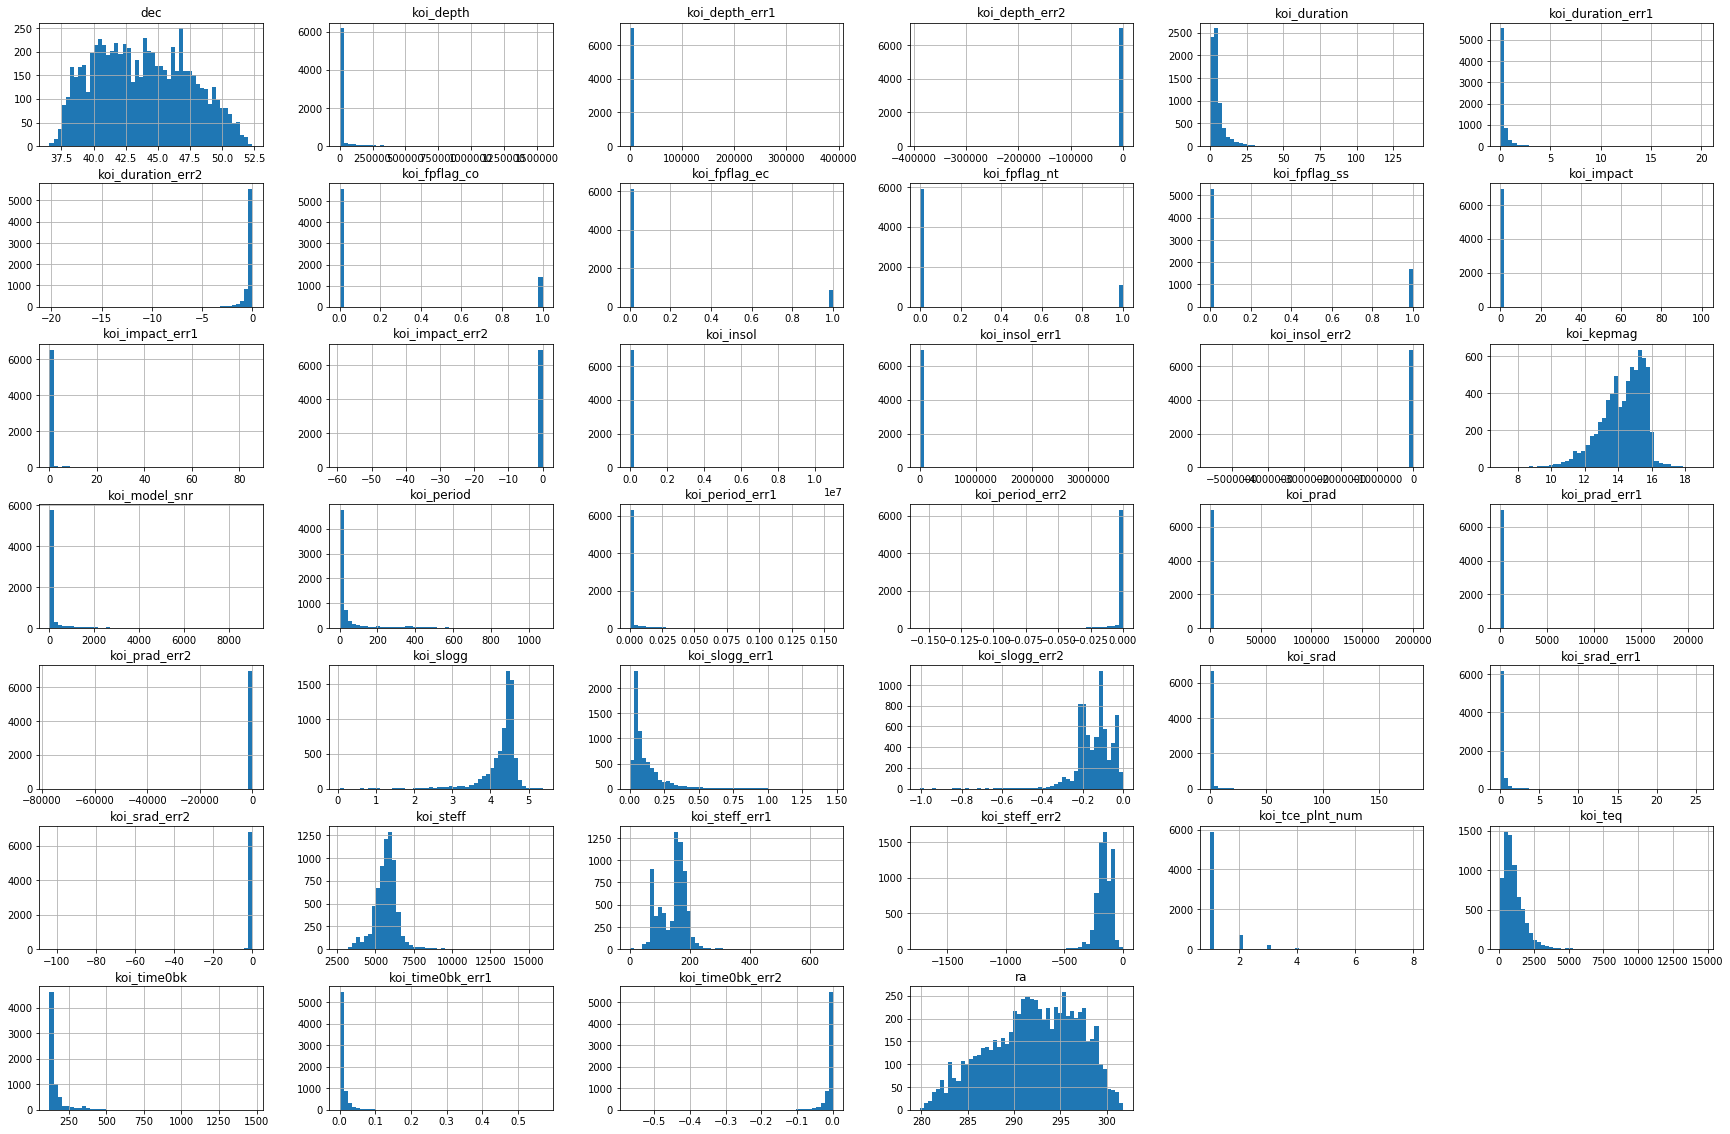

In [17]:
import matplotlib.pyplot as plt 
clean_df.hist(bins=50, figsize=(30,20))
plt.show()